# K Means Clustering
K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

** Import the libraries you usually use for data analysis.**

In [1]:
import pandas as pd

## Get the Data
** Read in the Mall_Customers.csv file using read_csv.**

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop(['CustomerID','Genre','Age'],axis=1,inplace=True)

In [5]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
import seaborn as sns

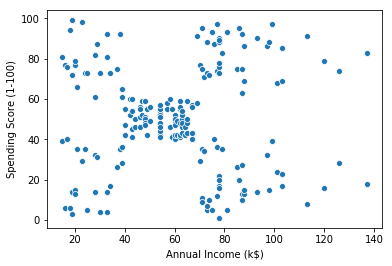

In [7]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

**Train data using initially n_clusters = 1, by creating object of KMeans library**

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans=KMeans(n_clusters=1)

In [10]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.inertia_   

269981.28

In [12]:
kmeans.cluster_centers_

array([[60.56, 50.2 ]])

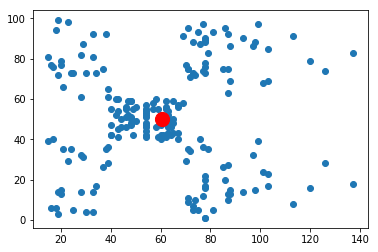

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df.values[:,0],df.values[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='R',s=200)

## Using the elbow method to find the optimal number of clusters

In [14]:
wcss=[]
for i in range(1,41):
    km=KMeans( n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)

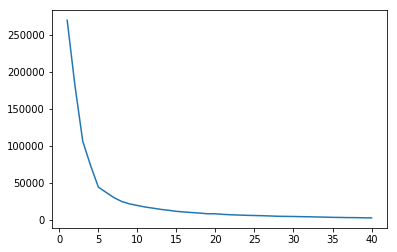

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1,41),wcss)

## Fitting K-Means to the dataset
**From above elbow method, it's clear that 5 is value of cluster. So using that value wi will train our model.**

In [25]:
km=KMeans(n_clusters=5)

In [26]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
km.inertia_

44448.45544793371

## Visualising the clusters

In [28]:
km.cluster_centers_

array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [33]:
pred =km.predict(df)

In [34]:
pred

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [35]:
df['cluster']=pred

In [36]:
df.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,0
1,15,81,3
2,16,6,0
3,16,77,3
4,17,40,0


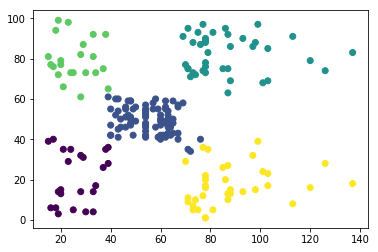

In [37]:
plt.scatter(df.values[:,0],df.values[:,1],c=df['cluster'])

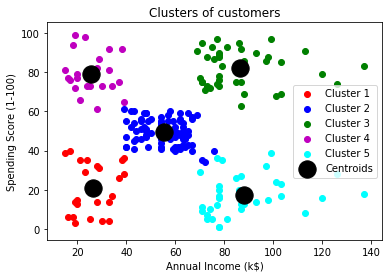

In [43]:
plt.scatter(df.values[df['cluster']==0,0],df.values[df['cluster']==0,1],c='r',label = 'Cluster 1')
plt.scatter(df.values[df['cluster']==1,0],df.values[df['cluster']==1,1],c='b',label = 'Cluster 2')
plt.scatter(df.values[df['cluster']==2,0],df.values[df['cluster']==2,1],c='g',label = 'Cluster 3')
plt.scatter(df.values[df['cluster']==3,0],df.values[df['cluster']==3,1],c='m',label = 'Cluster 4')
plt.scatter(df.values[df['cluster']==4,0],df.values[df['cluster']==4,1],c='cyan',label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='k',s=300,label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()